<a href="https://colab.research.google.com/github/Inam-karim/AI-and-Data-science/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
a=np.array([1,2,3,4,5,6])
print(a)
#check type of array
print(type(a))
#check data type
print(a.dtype)
#we find the length of an array
print(len(a))
#we target Value by index
a[0]=12
print(a)
#slicing in array
d=a[1:3]
print(d)
#step size last index
d=a[0:6:2]
print(d)
d=np.zeros((4,4))
print(d)
b=np.array([[1,2,3],[3,4,5],[5,4,3]], dtype='int64')
print(b)


[1 2 3 4 5 6]
<class 'numpy.ndarray'>
int64
6
[12  2  3  4  5  6]
[2 3]
[12  3  5]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1 2 3]
 [3 4 5]
 [5 4 3]]


In [ ]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
df=pd.read_csv('/content/dataset_2.csv')
print(df)
X = df[['length', 'width']]
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy = logreg.score(X_test, y_test)
print("Accuracy:", accuracy)

    length  width  Type
0      5.1    3.5     0
1      4.9    3.0     0
2      4.7    3.2     0
3      4.6    3.1     0
4      5.0    3.6     0
..     ...    ...   ...
95     5.7    3.0     1
96     5.7    2.9     1
97     6.2    2.9     1
98     5.1    2.5     1
99     5.7    2.8     1

[100 rows x 3 columns]
Accuracy: 1.0


Training score : 1.0
Test accuracy : 1.0


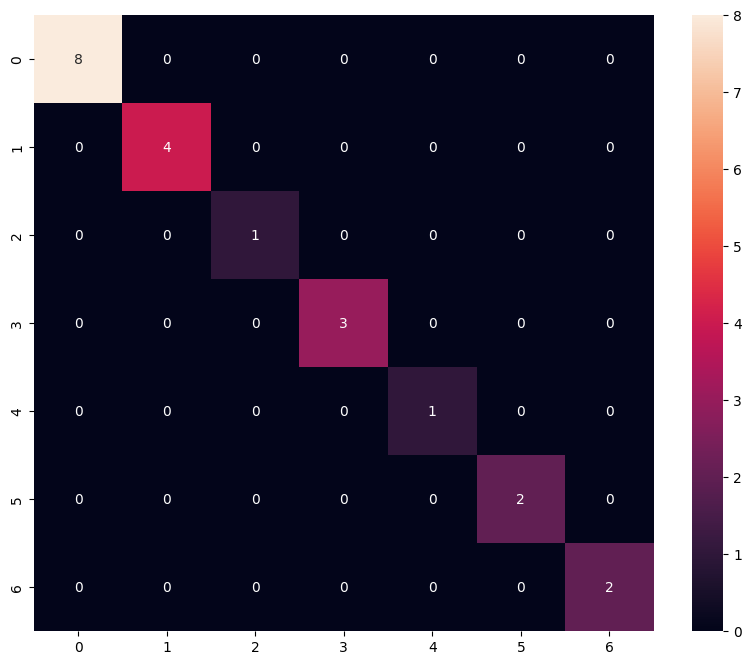

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
data=pd.read_csv('/content/SVM_dataset.csv')
def readData(filename):
  data = pd.read_csv(filename)
  X=data.drop(['class_type'], axis=1)
  y=data['class_type']
  return X,y
def svm(X,y):
  X_train, X_test, y_train, y_test =train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
  model =SVC(kernel='linear')
  model.fit(X_train, y_train)
  y_train_pred=model.predict(X_train)
  print("Training score :", accuracy_score(y_train, y_train_pred))
  y_test_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test, y_test_pred)
  print("Test accuracy :", accuracy)
  return y_test_pred,y_test
X,y=readData('/content/SVM_dataset.csv')
y_test_pred, y_test=svm(X,y)
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True)
plt.show()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
15/15 [==============================] - 1s 2ms/step - loss: 2.5903 - accuracy: 0.3417
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 2.2434 - accuracy: 0.3417
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 1.9813 - accuracy: 0.3417
Epoch 4/50
15/15 [==========

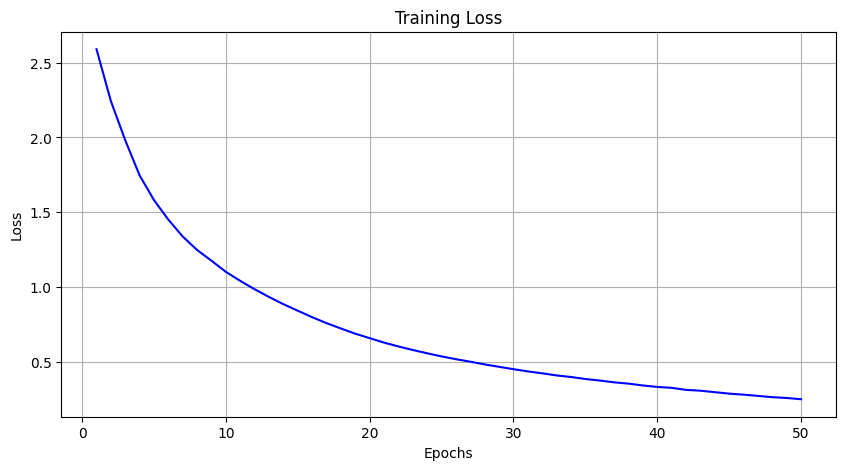

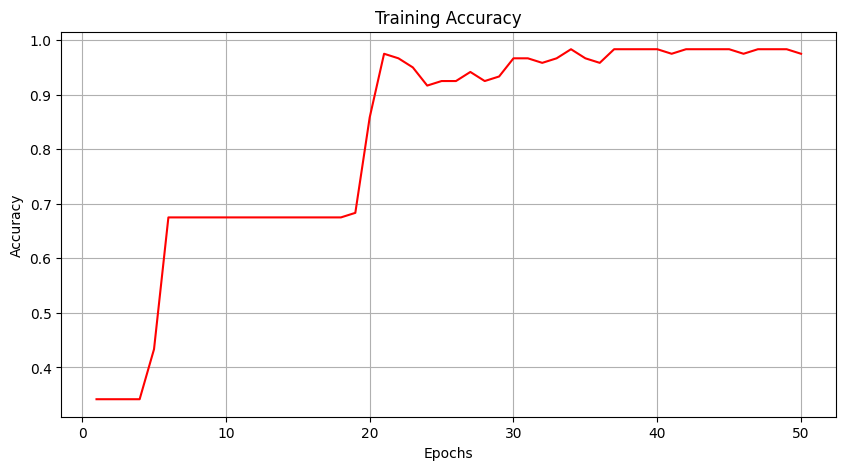

Test Loss: 0.2719951272010803
Test Accuracy: 0.9666666388511658
1/1 [==============================] - 0s 88ms/step


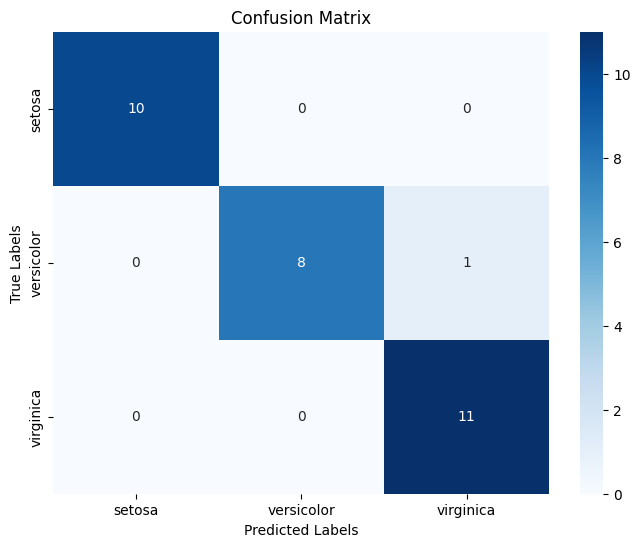

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

df = pd.DataFrame(data=X, columns=["Sepal_length", "Sepal_width", "Petal_length", "Petal_width"])
df["Species"] = y

encoder = OneHotEncoder(categories="auto")
y = encoder.fit_transform(y).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

loss = history.history['loss']
accuracy = history.history['accuracy']

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss) + 1), loss, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy) + 1), accuracy, color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.grid(True)
plt.show()

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

